In [116]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Q1 (A)

I will be using these x and y values for my analysis.

x = 3; 
y = 20

We are given here that the background noise has a poisson distribution.
For the next few plots, I will vary the number of iterations to show how the probability distribution changes if I sum the distribution for more days.

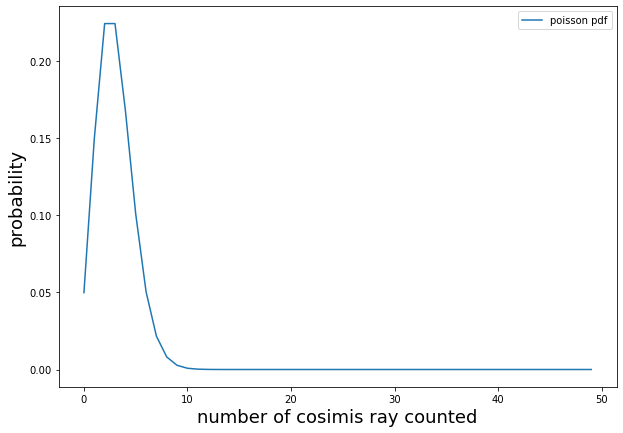

In [117]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = range(0,50)
mu = 3
prob = stats.poisson.pmf(x, mu) 
ax.plot(x,prob, label='poisson pdf')
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18)
ax.legend();

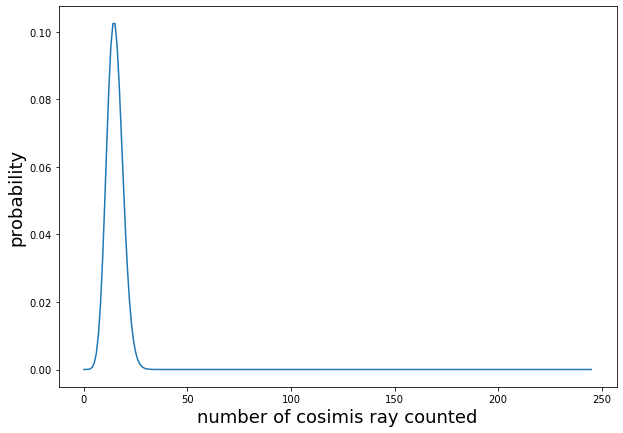

In [118]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
d1 = stats.poisson.pmf(x, mu)
d2 = stats.poisson.pmf(x, mu)

n = 5
for i in range(1, n):
    
    dist_5 = np.convolve(d1,d2)
    d1 =  dist_5

ax.plot(dist_5);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);

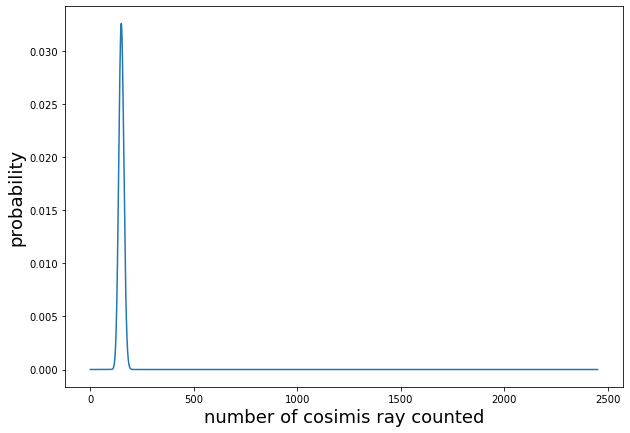

In [119]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
d1 = stats.poisson.pmf(x, mu)

n = 50
for i in range(1, n):
    
    dist_50 = np.convolve(d1,d2)
    d1 =  dist_50

plt.plot(dist_50);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);

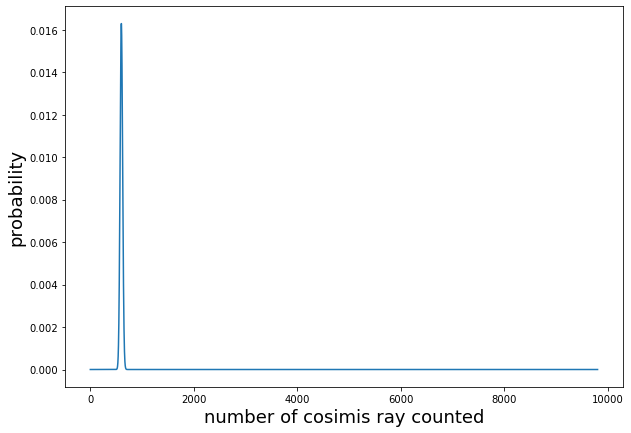

In [120]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
d1 = stats.poisson.pmf(x, mu)
n = 200
for i in range(1, n):
    
    dist_200 = np.convolve(d1,d2)
    d1 =  dist_200

ax.plot(dist_200);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);

# Q1B
Here you can see that by changing the summing the probability for 5 days, the distribution is still a poisson distribution. This is the unique property of poisson distribution. The more numbers we convolve the higher the mean value of the final distribution. This is because as we convolve the two distribution we are ultimately summing the two independent random variables from the two distributions so the mean value increases.

# Q1 C

Following three plots are the probability distribution of average days corresponding to the sum distribution integrated for 5 days, 50 days and 200 days. The width of the peak narrows as more days are integrated. And the distribution starts to look more symmetric like a Gaussian distribution. According to the central limit theorem, the more number of samples we add the distriubtion will tend to Gaussian. This also applys to the poisson distribution. If I increase the number of convolution high enough to distribution will take on a shape that is Gaussian distribution.

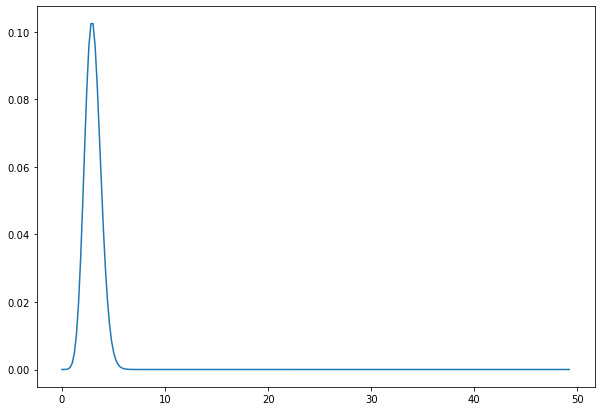

In [121]:
n = 5
left = 0
right = dist_5.size
cx = np.linspace(left, right, dist_5.size)
ave_x = cx/n

plt.plot(ave_x, dist_5);

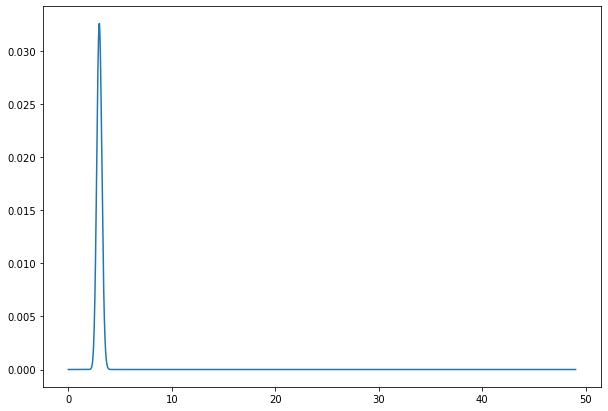

In [122]:
n = 50
left = 0
right = dist_50.size
cx = np.linspace(left, right, dist_50.size)
ave_x = cx/n

plt.plot(ave_x, dist_50);

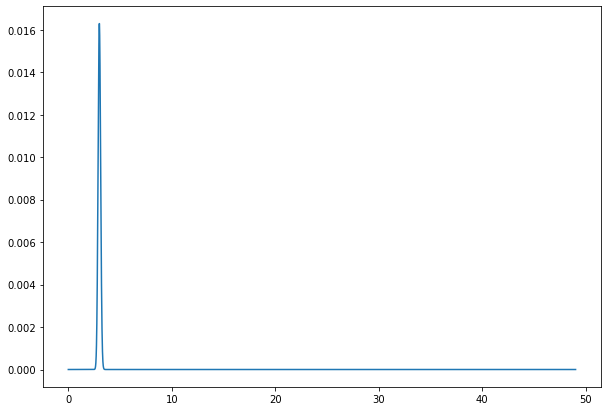

In [123]:
n = 200
left = 0
right = dist_200.size
cx = np.linspace(left, right, dist_200.size)
ave_x = cx/n

plt.plot(ave_x, dist_200);

# Q1 D
I chose the hypothetical number of dyas N to be 50. And I am seeing YxN = 100 gamma rays from my sourse.
 

In [124]:
#mean_value=np.max(dist_50)
#start = 0
#end = dist_50.size

# Using this code to find where YxN is relative to the mean.
#for i in range(start, end):
 #   if dist_50[i] == mean_value:
  #      mean_x = i


prob = np.sum(dist_50[0:100])
print('The probability that it is more signal-like = {:.6%}'.format(prob))

sigma = stats.norm.ppf(prob)
print('sigma = {:.6f}'.format(sigma))


The probability that it is more signal-like = 0.000592%
sigma = -4.380346


The probability that the cosmic ray background would have given me measurement as signal-like ore moren than the signal that I recieved is 4.38 sigma.

# Q2 A

Rayleigh distribution

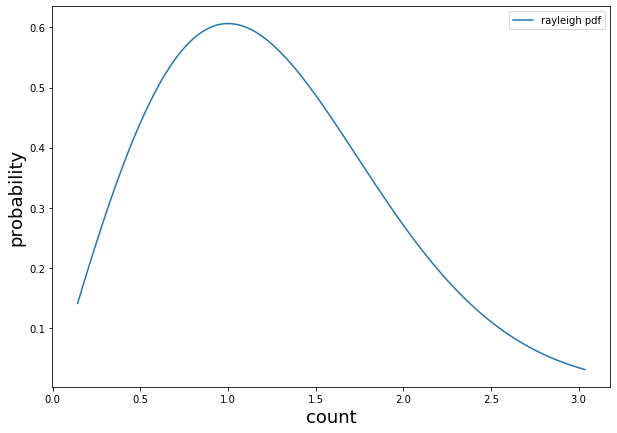

In [125]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
ax.plot(x, stats.rayleigh.pdf(x), label='rayleigh pdf')
ax.legend()
plt.xlabel('count', fontsize=18)
plt.ylabel('probability', fontsize=18);

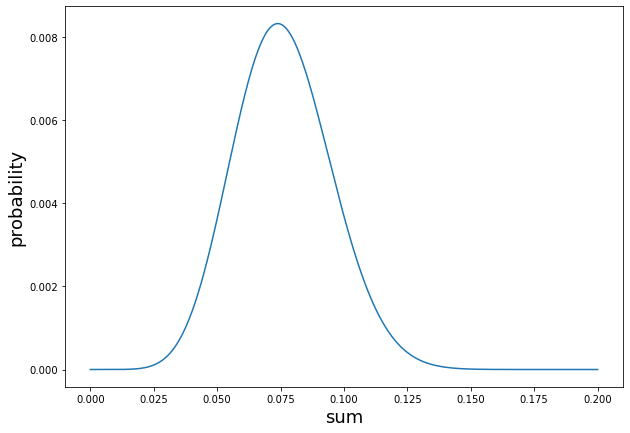

In [126]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
d1 = stats.rayleigh.pdf(x)
d2 = stats.rayleigh.pdf(x)

n = 5
for i in range(1, n):
    
    dist_5 = np.convolve(d1,d2)
    d1 =  dist_5

dist_5 = dist_5/dist_5.sum()
#plt.plot(dist_5);
left, right = plt.xlim()
x_sum = np.linspace(left, right, dist_5.size)
cx = x_sum/n

plt.plot(cx,dist_5);
plt.xlabel('sum', fontsize=18)
plt.ylabel('probability', fontsize=18);

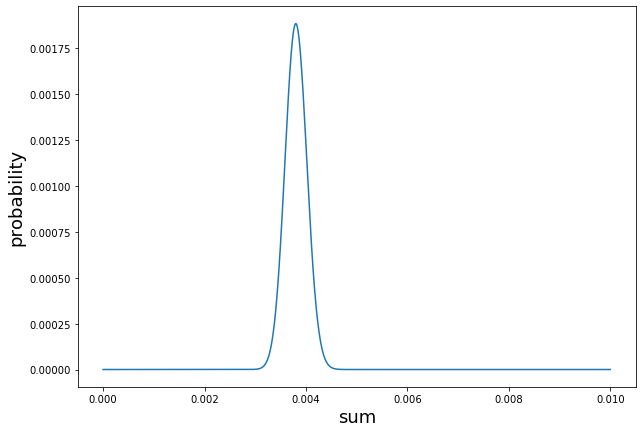

In [127]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
d1 = stats.rayleigh.pdf(x)
d2 = stats.rayleigh.pdf(x)

n = 100
for i in range(1, n):
    
    dist_100 = np.convolve(d1,d2)
    d1 =  dist_100

dist_100 = dist_100/dist_100.sum()
#plt.plot(dist_100);
left, right = plt.xlim()
x_sum = np.linspace(left, right, dist_100.size)
cx = x_sum/n

plt.plot(cx,dist_100);
plt.xlabel('sum', fontsize=18)
plt.ylabel('probability', fontsize=18);

# Q2 B

The shape approaches Gaussian distribution even after a very small number of intervals. At n = 5, the shape starts to look a lot like a Gaussian distribution

# Q3 A
From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X(pick something). Assuming you see a signal of strengh Y (pick a floating -point number. optical CCDs are not senstitive enough to count photons so the readings are floating point brightnesses, not integer photons.)Calculate the significance of your detection. Can you claims a discovery (traditionally 5-sigma or more)?


X = 6, 
Y = 4.2


The probability that the background could have produced the signal = 0.53%
sigma = -2.557


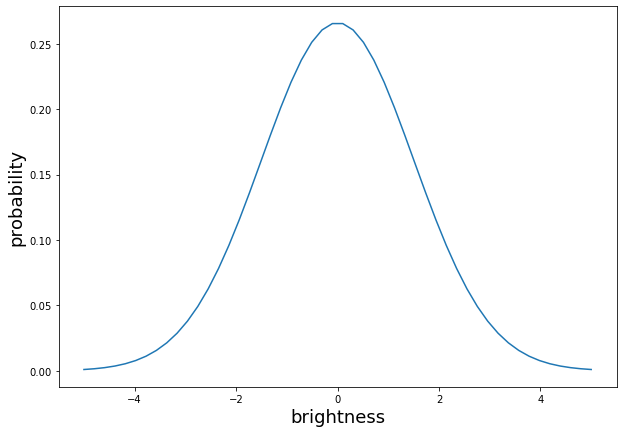

In [128]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = np.linspace(-5,5)
background = stats.norm.pdf(x,loc = 0, scale = 1.5)
ax.plot(x, background, label='norm pdf');
plt.xlabel('brightness', fontsize=18)
plt.ylabel('probability', fontsize=18);

signal_strength = 4.2
prob = stats.norm.pdf(signal_strength,loc = 0, scale = 1.5)
print('The probability that the background could have produced the signal = {:.2%}'.format(prob))

sigma = stats.norm.ppf(prob)
print('sigma = {:.3f}'.format(sigma))
#cdf

If we have a signal free background, the probability that the background would have produced something that is more signal like than the candidate signal of 4 is 0.53% and has a sigma of 2.557. The sigma is not high enough to give me a confidence to call what we measured a discovery. It could have been the background.

# Q3 B
If each pixel has a Gaussian distribution, what would be the distribution if we decide to look into 10k pixels?


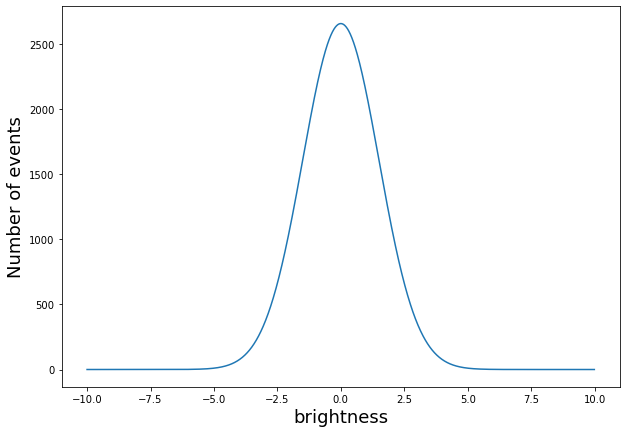

In [129]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = np.arange(-10, 10,0.01)
orig_norm = stats.norm.pdf(x,loc = 0, scale = 1.5)*10000

ax.plot(x, orig_norm , label='norm pdf');
plt.xlabel('brightness', fontsize=18)
plt.ylabel('Number of events', fontsize=18);

# Q3 C

In [130]:
x = np.arange(-10, 10, 0.01)
#x = np.arange(-5, 5, 0.01)
end = x.size
value = 4.2

for i in range(0, end):
    if np.isclose(x[i], 4.2, rtol=1e-03, equal_nan=False) == True:
        x_val = x[i]
        x_loc = i
     
print(x_val)
print(x_loc)

4.199999999999697
1420


In [131]:
prob = 0
events =0
total_events = 0

for i in range(x_loc, end):
    events = events + orig_norm[i]

for i in range(start, end):
    total_events = total_events + orig_norm[i]
 
prob = events/total_events
print('The probability for the candidate signal is = {:.3%}'.format(prob))
sigma = stats.norm.ppf(prob)
print('The sigma = {:.3f}'.format(sigma))

The probability for the candidate signal is = 0.258%
The sigma = -2.797


# Q4 A
Calculate the sigma

In [132]:
prob_for_5_sigma = 1-stats.norm.cdf(5)
print('The probability for 5 sigma = {:.12%}'.format(prob_for_5_sigma))

The probability for 5 sigma = 0.000028665157%


In [133]:
# Manually found the signal required for 5 sigma

for i in np.arange(2.5570, 10, 0.0001):
    if prob > prob_for_5_sigma:
        prob = stats.norm.pdf(i,loc = 0, scale = 1.5)
        #prob = stats.norm.pdf(7.86,loc = 0, scale = 1.5)
        signal = i
        
print('The probability for 5 sigma = {:.12%}'.format(prob))
print('The value of the signal for 5 sigma = {:.3f}'.format(i))

The probability for 5 sigma = 0.000028662716%
The value of the signal for 5 sigma = 10.000


# Q4 B
Calculate the sigma

In [134]:
x = np.arange(-10, 10, 0.01)
end = x.size
prob = 0
events = 0
x_val = 0
x_loc = 0


for i in range(end-1, 0, -1):
   
    events = events + orig_norm[i]
    prob = events/total_events 
    if np.isclose(prob_for_5_sigma,prob, rtol=1e-6, equal_nan=False) == True:
        x_val = x[i]
        x_loc = i


print('The signal brightness for 5 sigma = {:.3f}'.format(x_val))

The signal brightness for 5 sigma = 7.500


# Q4C
The sensitivity penalty due to a trial factor of 10k is very low because the overall distribution gets lifted up by the trial factor. By changing the shape of the curve it changes the size of the probability density below the curve. This means making a little change to the candidate sinal or value (to the right or left of it) will have a larger effect on the sigma. So in this this case, we do not have look for a sinificantly brighter signal to make a discovery compared to a distribution with a higher sensitivity penalty. So here, for the 10,000 pixel case, we need to have a signal brightness of 7.5 to have a 5 sigma whereas for the 1 pixel case we need to have a signal brightness of 10 to call it a discovery (5 sigma)

# Q4 D

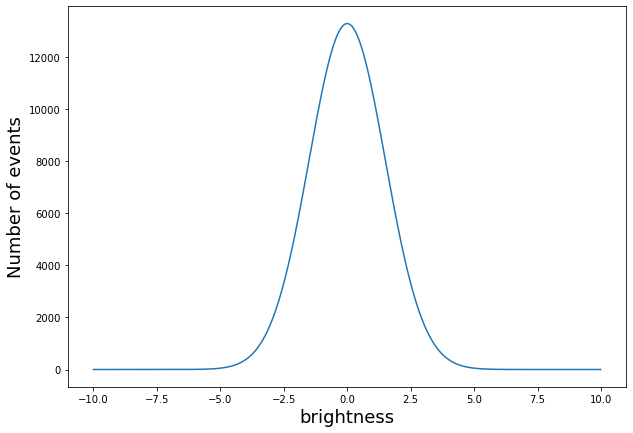

In [135]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = np.arange(-10, 10,0.01)
orig_norm = stats.norm.pdf(x,loc = 0, scale = 1.5)*50000

ax.plot(x, orig_norm , label='norm pdf');
plt.xlabel('brightness', fontsize=18)
plt.ylabel('Number of events', fontsize=18);

In [136]:
x = np.arange(-10, 10, 0.01)
end = x.size
prob = 0
events = 0
x_val = 0
x_loc = 0


for i in range(end-1, 0, -1):
   
    events = events + orig_norm[i]
    prob = events/total_events 
    if np.isclose(prob_for_5_sigma,prob, rtol=1e-6, equal_nan=False) == True:
        x_val = x[i]
        x_loc = i

print('The signal brightness for 5 sigma = {:.3f}'.format(x_val))

The signal brightness for 5 sigma = 7.950


As I increased the trial factor from 10k to 50k, the sensitivity penalty reduced further. I needed a sinal strength of 7.5 to have 5 sigma in 10k trial case, but I only needed to increase the signal strength to 7.95 to get 5 sigma in the 50k trial case.